In [1]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 24.1 MB/s eta 0:00:00


In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 46.3 MB/s eta 0:00:00


In [3]:
!pip uninstall cython
!pip install cython
!pip uninstall cartopy
!pip install cartopy

Found existing installation: Cython 0.29.33
Uninstalling Cython-0.29.33:
  Would remove:
    /usr/local/bin/cygdb
    /usr/local/bin/cython
    /usr/local/bin/cythonize
    /usr/local/lib/python3.9/dist-packages/Cython-0.29.33.dist-info/*
    /usr/local/lib/python3.9/dist-packages/Cython/*
    /usr/local/lib/python3.9/dist-packages/cython.py
    /usr/local/lib/python3.9/dist-packages/pyximport/*
Proceed (Y/n)? y
  Successfully uninstalled Cython-0.29.33
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 55.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.

In [4]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 KB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.1-cp39-cp39-linux_x86_64.whl size=979757 sha256=ec4bbda41c6decc2cb85ae733f49896d2e718309d0aa2c26df512237e17c64b6
  Stored in directory: /root/.cache/pip/wheels/c2/f0/2b/e33fb469c9bf8d08688be4df902af6d7c2210128fc7c046889
Successfully built shapely


In [5]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

In [6]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
max(df['latitud'])

7.098317623

In [7]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=55, ellps='WGS84', preserve_units=True)

In [8]:
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,5.329316e+06,1.897464e+07
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,5.329679e+06,1.897410e+07
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,5.327456e+06,1.897277e+07
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,5.327791e+06,1.897604e+07
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,5.329806e+06,1.897591e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,5.328935e+06,1.897517e+07
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,5.329635e+06,1.897616e+07
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,5.329195e+06,1.897242e+07
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,5.328751e+06,1.897686e+07


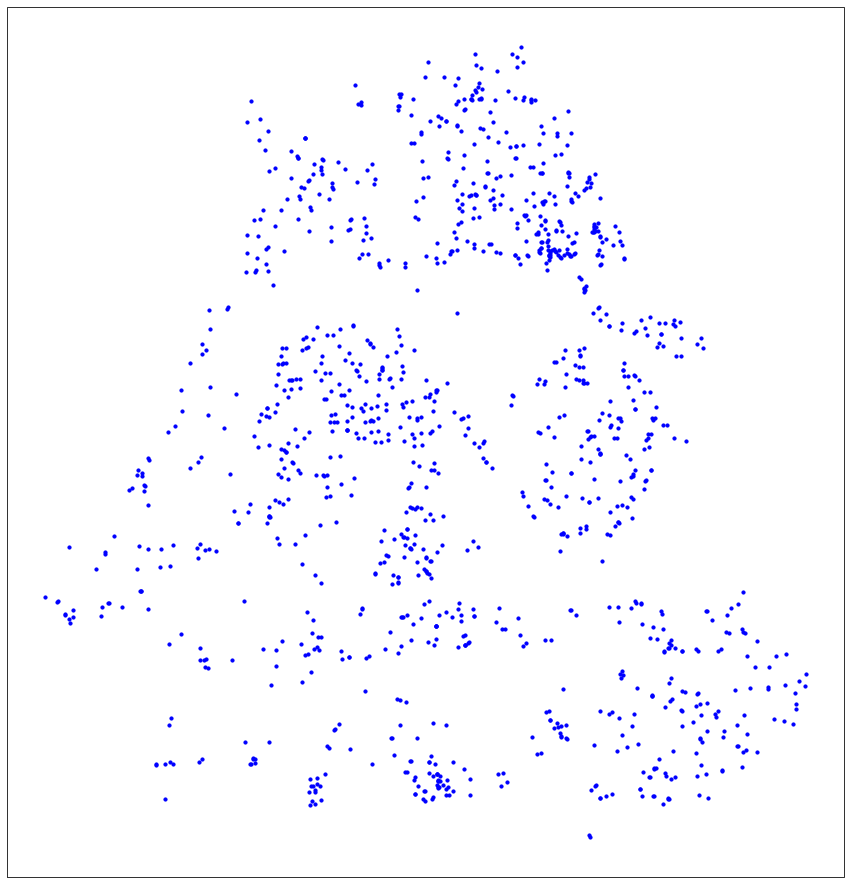

In [9]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
plt.show()

In [10]:
#Se carga la cartografía de Floridablanca
url = 'https://foscal.net/cartografia/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.qmd", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

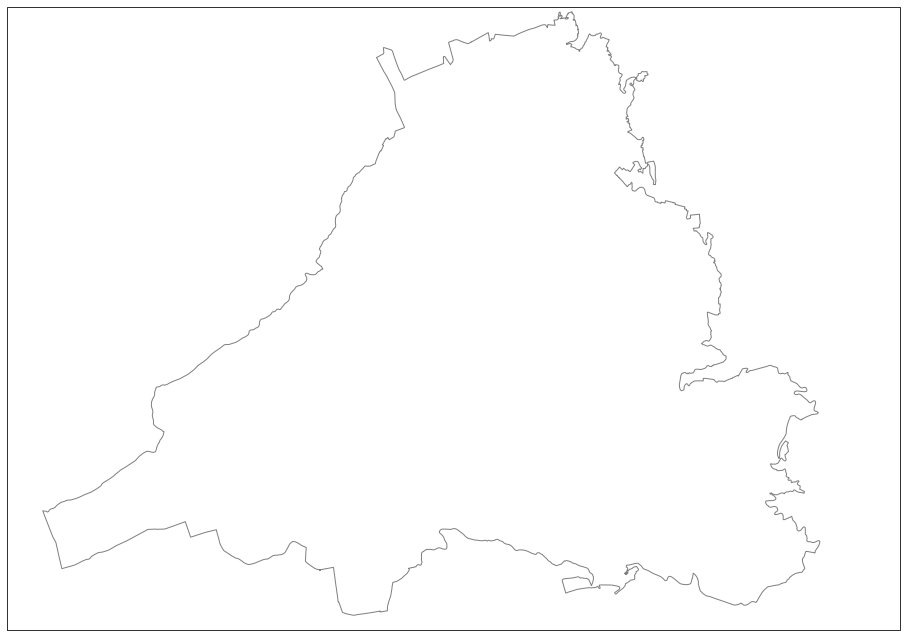

In [11]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Mapa de Floridablanca
lower_lon = -73.06738495
upper_lon = -73.13496625
lower_lat =  7.052170391
upper_lat =  7.099317623

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')



for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

plt.show()

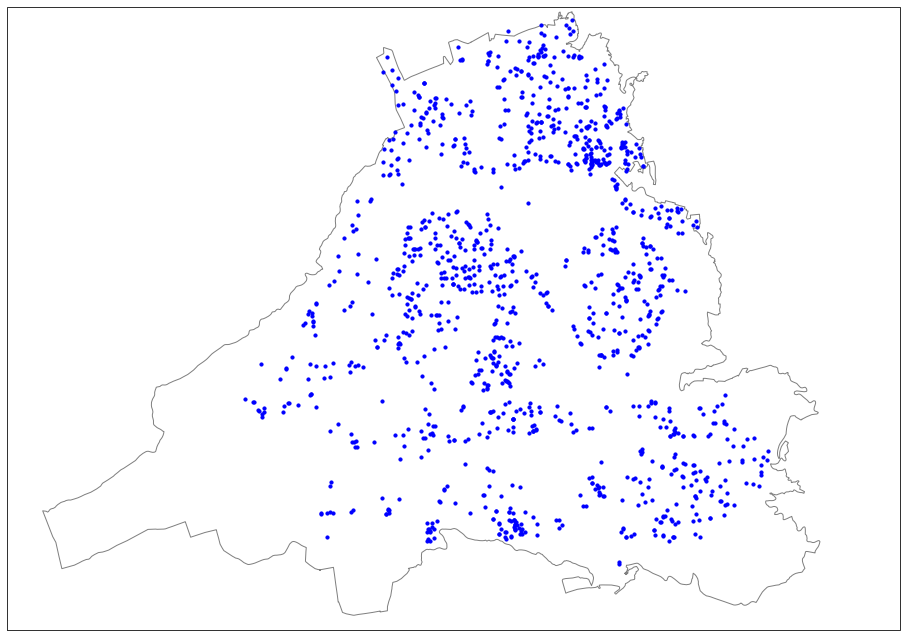

In [12]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Puntos y mapa de Floridablanca
lower_lon = -73.06738495
upper_lon = -73.13496625
lower_lat =  7.052170391
upper_lat =  7.099317623

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

plt.show()

In [13]:
floridablanca = gpd.read_file('68276_urbano.shp')
floridablanca_area = floridablanca.to_crs(epsg=32618)

area = floridablanca_area.geometry.area[0]
total_puntos = len(df)

print('Área: {}, Total puntos: {}'.format(area, total_puntos))

Área: 17030066.989459652, Total puntos: 1262


In [14]:
# Crear una lista y llenarla con cada punto (x, y)
listaPuntos = []
for i in range(df.shape[0]):
  listaPuntos.append((df['x'][i], df['y'][i]))


In [32]:
# Metodos encargados de calcular la distancia entre dos puntos y contar los pares que esten en el rango
def calcular_distacia(x1, y1, x2, y2):
  distancia = math.sqrt((x1 - x2)**2 + (y1 - y2)**2)
  return distancia

def contar_pares(x1, y1, x2, y2, distancia_max):
  conteo = 0
  if (calcular_distacia(x1, y1, x2, y2) <= distancia_max):
    conteo = 1
  return conteo

In [16]:
# Recorriendo la lista con los for aplicandole los metodos
conteo = 0
for i in range(len(listaPuntos)-1):
  x1 = listaPuntos[i][0]
  y1 = listaPuntos[i][1]
  for j in range(i+1, len(listaPuntos)):
    x2 = listaPuntos[j][0]
    y2 = listaPuntos[j][1]
    conteo += contar_pares(x1, y1, x2, y2, 100)

print(conteo)


2662


In [17]:
def funcion_k(conteo, area, puntos):
  return (conteo*area)/puntos**2

In [18]:

area_metros = floridablanca_area.geometry.area[0]
area_km = area_metros
total_puntos = len(df)
# conteo 3149
print('Area: {}, conteo: {}, #puntos: {}'.format(area_km, conteo, total_puntos))
print(funcion_k(conteo, area_km, total_puntos))

Area: 17030066.989459652, conteo: 2662, #puntos: 1262
28464.64013674217


In [19]:
def punto_en_poligono(x, y, poligono):
    """
    Comprueba si un punto (x, y) está dentro del polígono especificado.
    poligono es una lista de tuplas que representan los vértices del polígono.
    """
    punto = Point(x, y)
    return poligono.geometry.contains(punto).values[0]


def llenar_lista(total_puntos, poligono, min_lon, max_lon, min_lat, max_lat):
  lista = []
  while(len(lista) < total_puntos):
    x = random.uniform(min_lon, max_lon)
    y = random.uniform(min_lat, max_lat)
    if(punto_en_poligono(x, y, poligono)):
      lista.append((x, y))
  return lista

In [24]:
def contar_pares_total(lista, distancia):
  conteoAlea = 0
  for i in range(len(lista)-1):
    x1, y1 = P(lista[i][0], lista[i][1])
    for j in range(i+1, len(lista)):
      x2, y2 = P(lista[j][0], lista[j][1])
      conteoAlea += contar_pares(x1, y1, x2, y2, distancia)
  return conteoAlea


In [25]:
min_lon = -73.06738495
max_lon = -73.13496625
min_lat = 7.052170391
max_lat = 7.099317623
listaPuntos_utm = []
for i in range(df.shape[0]):
  listaPuntos_utm.append((df['longitud'][i], df['latitud'][i]))

df_listas = pd.DataFrame()
df_listas = df_listas.append({'listas': 'real', 'datos': listaPuntos_utm}, ignore_index=True)
for i in range(1, 10):
  df_listas = df_listas.append({'listas': i, 'datos': llenar_lista(total_puntos, floridablanca, min_lon, max_lon, min_lat, max_lat)}, ignore_index=True)

<ipython-input-25-f253183cf51d>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_listas = df_listas.append({'listas': 'real', 'datos': listaPuntos_utm}, ignore_index=True)
<ipython-input-25-f253183cf51d>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_listas = df_listas.append({'listas': i, 'datos': llenar_lista(total_puntos, floridablanca, min_lon, max_lon, min_lat, max_lat)}, ignore_index=True)
<ipython-input-25-f253183cf51d>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_listas = df_listas.append({'listas': i, 'datos': llenar_lista(total_puntos, floridablanca, min_lon, max_lon, min_lat, max_lat)}, ignore_index=True)
<ipython-input-25-f253183cf51d>:12: FutureWarning: The frame.append method is deprecated an

In [26]:
df_listas

,listas,datos
0,real,"[(-73.10250092, 7.076011181), (-73.10540009, 7..."
1,1,"[(-73.08242152909921, 7.080883961080758), (-73..."
2,2,"[(-73.09413393667751, 7.095793634368234), (-73..."
3,3,"[(-73.10115345452334, 7.06856926663996), (-73...."
4,4,"[(-73.09795837514473, 7.086332428947963), (-73..."
5,5,"[(-73.1024880664692, 7.085672254032253), (-73...."
6,6,"[(-73.08873117351011, 7.081143466534995), (-73..."
7,7,"[(-73.09458868121892, 7.076309553678528), (-73..."
8,8,"[(-73.10757359275784, 7.07965419892727), (-73...."
9,9,"[(-73.07886035286465, 7.070793011573327), (-73..."


In [27]:
arry=[1,2,3,4,5,6,7,8,9,10]

def calculate_percentile(arry, percentile):
    size = len(arry)
    return sorted(arry)[int(math.ceil((size * percentile) / 100)) - 1]

percentile_25 = calculate_percentile(arry, 2.5)
percentile_975 = calculate_percentile(arry, 97.5)

print("The 2.5 percentile is:",percentile_25)
print("The 97.5th percentile is:",percentile_975)

The 2.5 percentile is: 1
The 97.5th percentile is: 10


In [28]:
import pandas as pd

datos = [[{'count': 6, 'item_id': 11313}, {'count': 6, 'item_id': 11348},
          {'count': 1, 'item_id': 11338}, ],[{'count': 4, 'item_id': 11311},
          {'count': 3, 'item_id': 11281}]]


res = pd.concat(objs = (pd.DataFrame(f) for f in datos),
                keys = (n for n in range(len(datos))),
                names = ['user_id'])

res.reset_index(level = 0, inplace = True)
res.reset_index(drop = True, inplace = True)

res

,user_id,count,item_id
0,0,6,11313
1,0,6,11348
2,0,1,11338
3,1,4,11311
4,1,3,11281


In [29]:
columns = ['Lista']
columns.extend(['k({})'.format(i) for i in range(10, 201, 10)])

df_k = pd.DataFrame(columns = columns, index = range(10))

for i in range(10):
  df_k.iloc[i][0] = (i)
  for j in range(1, 21):
    df_k.iloc[i][j] = (funcion_k(contar_pares_total(df_listas['datos'][i], j*10), area_metros, total_puntos))
  print(i)


print(df_k)



1636.0217659359698
0
1
2
3
4
5
6
7
8
9
  Lista        k(10)       k(20)        k(30)        k(40)        k(50)  \
0     0  1636.021766  3186.49991  5014.994825  7217.743085  9773.358785   
1     1    96.236574  395.639251   844.743265  1507.706333  2309.677787   
2     2   139.008385  395.639251   834.050312  1432.855664  2256.213024   
3     3    96.236574  299.402676   705.734879   1336.61909   2202.74826   
4     4    74.850669  491.875825   898.208028   1571.86405  2598.387511   
5     5    96.236574  459.796967   812.664407  1379.390901   2085.12578   
6     6    64.157716  395.639251   930.286887  1539.785191  2384.528456   
7     7    117.62248  374.253345   973.058697  1668.100624  2534.229794   
8     8    117.62248  213.859054   620.191258  1304.540232  1914.038537   
9     9    42.771811  331.481534   727.120785  1379.390901  2117.204638   

          k(60)         k(70)         k(80)        k(90)  ...        k(110)  \
0  12799.464404  16499.226045  20156.215874  24347.85334

In [30]:
df_k

,Lista,k(10),k(20),k(30),k(40),k(50),k(60),k(70),k(80),k(90),...,k(110),k(120),k(130),k(140),k(150),k(160),k(170),k(180),k(190),k(200)
0,0,1636.021766,3186.49991,5014.994825,7217.743085,9773.358785,12799.464404,16499.226045,20156.215874,24347.85334,...,32870.136657,37649.886522,42386.864576,47476.71007,53069.124342,58907.476526,64703.0569,71493.081876,78261.720947,85554.314701
1,1,96.236574,395.639251,844.743265,1507.706333,2309.677787,3336.201248,4736.978054,6127.061908,7773.776626,...,11366.60874,13408.962709,15162.606955,17675.450844,20177.60178,22775.98929,25342.297943,28133.158602,31341.044418,34634.473855
2,2,139.008385,395.639251,834.050312,1432.855664,2256.213024,3239.964674,4512.426047,5955.974664,7559.917572,...,11152.749685,13045.402317,15526.167347,17910.695804,20423.539692,23107.470825,26058.725775,29074.138442,32057.47225,35832.08456
3,3,96.236574,299.402676,705.734879,1336.61909,2202.74826,3325.508295,4512.426047,5881.123995,7153.585369,...,10928.197678,12927.779837,15066.37038,17515.056553,19953.049773,22647.673858,25556.156997,28571.569664,31544.21052,35126.34968
4,4,74.850669,491.875825,898.208028,1571.86405,2598.387511,3571.446208,4875.98644,6084.290097,7463.680998,...,11003.048347,13098.86708,15237.457624,17696.836749,20295.22426,23193.014447,26219.120066,29320.076354,32549.348075,35500.603026
5,5,96.236574,459.796967,812.664407,1379.390901,2085.12578,2961.947903,3870.848884,5175.389116,6693.788402,...,10553.944333,12435.904012,14841.818373,16980.408917,19653.647097,22273.420513,25256.754321,28592.955569,31779.455479,35137.042633
6,6,64.157716,395.639251,930.286887,1539.785191,2384.528456,3368.280106,4491.040142,6009.439428,7677.540052,...,11334.529882,13024.016411,15312.308293,17450.898837,20070.672253,22497.97252,25171.210699,28026.229075,31127.185364,34292.299368
7,7,117.62248,374.253345,973.058697,1668.100624,2534.229794,3656.98983,4865.293487,6233.991435,7773.776626,...,11409.380551,13312.726135,15365.773057,17686.143796,20145.522922,22636.980905,25588.235855,28881.665293,31982.621581,35104.963775
8,8,117.62248,213.859054,620.191258,1304.540232,1914.038537,2812.246565,4170.25156,5506.87065,7057.348794,...,10575.330239,12703.22783,14713.502941,16884.172343,19386.323279,21941.938978,24540.326489,27438.116676,30186.205524,33928.738976
9,9,42.771811,331.481534,727.120785,1379.390901,2117.204638,3004.719714,4405.49652,5667.264941,7121.506511,...,10618.10205,12393.132201,14510.336839,16905.558248,19343.551468,22006.096695,24604.484205,27427.423723,30367.985721,33672.108111


In [36]:
df_k['k(10)']

0    1636.021766
1      96.236574
2     139.008385
3      96.236574
4      74.850669
5      96.236574
6      64.157716
7      117.62248
8      117.62248
9      42.771811
Name: k(10), dtype: object

In [78]:
lista_orden_alea = []
num = 0

for i in range(10, 201, 10):
  lista_aux = []
  lista_aux.extend(df_k['k({})'.format(i)])
  lista_aux.sort()
  lista_orden_alea.append(lista_aux)

lista_orden_alea

[[42.771810874143,
  64.15771631121451,
  74.85066902975026,
  96.23657446682176,
  96.23657446682176,
  96.23657446682176,
  117.62247990389326,
  117.62247990389326,
  139.00838534096476,
  1636.0217659359698],
 [213.859054370715,
  299.40267611900106,
  331.4815342746083,
  374.25334514875124,
  395.6392505858228,
  395.6392505858228,
  395.6392505858228,
  459.7969668970373,
  491.87582505264453,
  3186.4999101236535],
 [620.1912576750735,
  705.7348794233595,
  727.1207848604311,
  812.6644066087171,
  834.0503120457886,
  844.7432647643244,
  898.2080283570032,
  930.2868865126103,
  973.0586973867534,
  5014.994824993267],
 [1304.5402316613618,
  1336.6190898169689,
  1379.3909006911117,
  1379.3909006911117,
  1432.8556642837907,
  1507.7063333135409,
  1539.7851914691482,
  1571.8640496247551,
  1668.1006240915772,
  7217.743085011632],
 [1914.0385366178996,
  2085.125780114471,
  2117.2046382700787,
  2202.748260018365,
  2256.2130236110434,
  2309.677787203722,
  2384.528456

In [103]:
from numpy.lib.function_base import percentile

lista_datos = []
for i in range(20):
  d = (i+1)*10
  k = df_k.iloc[0][i+1]
  p25 = (np.percentile(lista_orden_alea[i], 2.5))
  p97 = (np.percentile(lista_orden_alea[i], 97.5))

  lista_datos.append([d, k, p25, p97])
lista_datos

[[10, 1636.0217659359698, 47.583639597484094, 1299.1937553020944],
 [20, 3186.4999101236535, 233.10636926407938, 2580.2094909826774],
 [30, 5014.994824993267, 639.4385725684378, 4105.5591962818025],
 [40, 7217.743085011632, 1311.7579747463733, 5969.073531304621],
 [50, 9773.358784741677, 1952.5331664046282, 8158.990248060743],
 [60, 12799.464404087295, 2845.9293660382905, 10742.407624858983],
 [70, 16499.226044700663, 3938.2144862367168, 13883.997133564786],
 [80, 20156.215874439888, 5249.97246098309, 17023.715375544845],
 [90, 24347.853340105903, 6775.589490100178, 20618.686079516567],
 [100, 28464.64013674217, 8531.639650301713, 24201.359887861974],
 [110, 32870.136656778894, 10558.756161918127, 28041.46653290612],
 [120, 37649.88652196438, 12402.755858229617, 32195.678664057265],
 [130, 42386.864576275715, 14556.049211924754, 36343.20769975932],
 [140, 47476.71007029873, 16888.984171291293, 40824.35686027969],
 [150, 53069.124342092924, 19353.175125277856, 45723.86779591277],
 [160,

In [104]:
df_resultado = pd.DataFrame(lista_datos, columns=['d', 'k', 'p25', 'p97'])
df_resultado

,d,k,p25,p97
0,10,1636.021766,47.583640,1299.193755
1,20,3186.499910,233.106369,2580.209491
2,30,5014.994825,639.438573,4105.559196
3,40,7217.743085,1311.757975,5969.073531
4,50,9773.358785,1952.533166,8158.990248
5,60,12799.464404,2845.929366,10742.407625
6,70,16499.226045,3938.214486,13883.997134
7,80,20156.215874,5249.972461,17023.715376
8,90,24347.853340,6775.589490,20618.686080
9,100,28464.640137,8531.639650,24201.359888


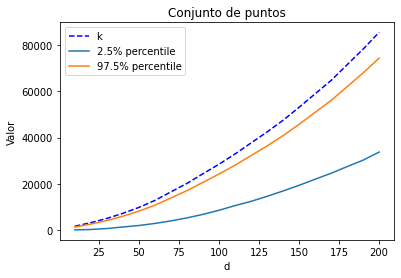

In [113]:
plt.title('Conjunto de puntos')
plt.plot(df_resultado['d'], df_resultado['k'], label='k', linestyle='--', color='blue')
plt.plot(df_resultado['d'], df_resultado['p25'], label='2.5% percentile')
plt.plot(df_resultado['d'], df_resultado['p97'], label='97.5% percentile')
plt.xlabel('d')
plt.ylabel('Valor')
plt.legend()
plt.show()